# Perceptron for XOR dataset

In [1]:
import numpy as np
import matplotlib.pyplot as plt


In [2]:
center1 = [[0,0],[1,1]]
center2 = [[0,1],[1,0]]

radius = 0.45
num_samples = 100
theta = np.linspace(0, 2*np.pi, num_samples)
a, b = 1 * np.cos(theta), 1 * np.sin(theta)

r = radius*np.random.random((num_samples))
x11, y11 = center1[0][0]+r * np.cos(theta), center1[0][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x12, y12 = center1[1][0]+r * np.cos(theta), center1[1][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x21, y21 = center2[0][0]+r * np.cos(theta), center2[0][1]+r * np.sin(theta)
r = radius*np.random.random((num_samples))
x22, y22 = center2[1][0]+r * np.cos(theta), center2[1][1]+r * np.sin(theta)
x1 = np.append(x11,x12)
y1 = np.append(y11,y12)
x2 = np.append(x21,x22)
y2 = np.append(y21,y22)

In [3]:
# x11.shape, x12.shape

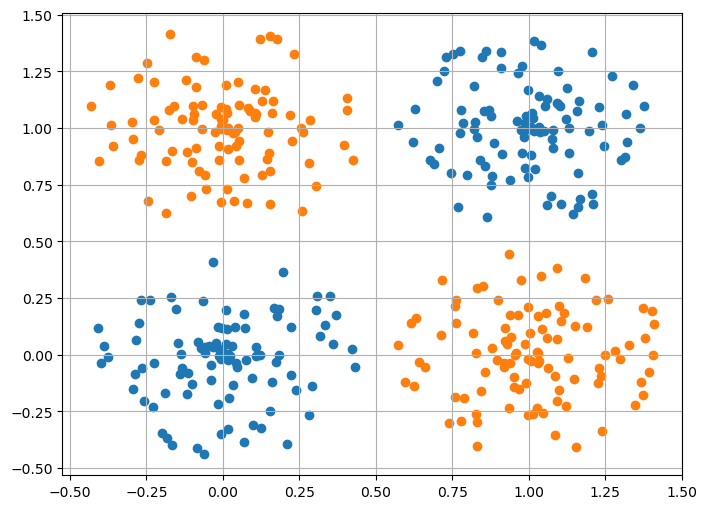

In [4]:
plt.figure(figsize=(8,6))

plt.scatter(x1, y1)
plt.scatter(x2,y2)
plt.grid()
# plt.savefig("XOR.png")
plt.show()

In [5]:
## Format the Data Matrix
x1 = np.matrix(x1).T
y1 = np.matrix(y1).T
x2 = np.matrix(x2).T
y2 = np.matrix(y2).T


data0 = np.hstack((x1,y1))
data1 = np.hstack((x2,y2))
data0.shape, data1.shape
data = np.append(data0,data1,axis=0)
data=data.reshape(400,2)
data.shape
# data=np.asarray(data)

(400, 2)

In [6]:
## Add Labels to each point
labels = np.matrix(np.append(np.zeros((200)),np.ones((200)))).T
labels.shape

(400, 1)

In [7]:
data

matrix([[ 1.21641754e-01,  0.00000000e+00],
        [ 4.20470330e-01,  2.67216758e-02],
        [ 3.58783638e-01,  4.57876715e-02],
        [ 1.72075297e-02,  3.31647951e-03],
        [ 3.16429399e-01,  8.21020850e-02],
        [ 1.09940991e-01,  3.61081034e-02],
        [ 3.32632667e-01,  1.33166032e-01],
        [ 3.69424228e-01,  1.75846702e-01],
        [ 2.22308381e-01,  1.23689062e-01],
        [ 3.05225780e-01,  1.96156698e-01],
        [ 3.49430019e-01,  2.57279872e-01],
        [ 3.08538084e-01,  2.58894193e-01],
        [ 1.78107963e-01,  1.69825600e-01],
        [ 1.85003670e-01,  2.00295176e-01],
        [ 1.67785077e-01,  2.06526435e-01],
        [ 2.88492954e-02,  4.05131667e-02],
        [ 7.29317527e-02,  1.17543572e-01],
        [ 1.96226036e-01,  3.66239028e-01],
        [ 3.15765524e-04,  6.91430052e-04],
        [ 6.77879031e-02,  1.77434490e-01],
        [ 3.80769617e-02,  1.22456319e-01],
        [ 1.13624171e-02,  4.68365213e-02],
        [ 1.10058007e-03,  6.241

## Exercise 1
Use perceptron model from sklearn and report f1 score for positive and negative class.

# Multi layer perceptron for XOR dataset
A multi-layer perceptron (MLP), or neural network with hidden layers, can solve the XOR problem because it is capable of learning and representing non-linear relationships in the data. The XOR function is not linearly separable, meaning a single straight line cannot be drawn to separate the two classes. However, by introducing non-linear activation functions in the hidden layers, an MLP can model the non-linear decision boundaries required for XOR-like problems.

## MLP from sklearn
sklearn.neural_network.MLPClassifier()

In [8]:
# ## Prepare dataset
# from sklearn.datasets import load_wine
# data = load_wine()
# X = data.data
# y = data.target

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(np.asarray(data), np.asarray(labels), test_size=0.2)
# X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.fit_transform(X_test)

In [9]:
X_train.shape

(320, 2)

In [10]:
from sklearn.neural_network import MLPClassifier

# Multi Layer Perceptron. Layer_size is 2 dimensional
clf = MLPClassifier(hidden_layer_sizes = (3,3 ), activation = 'logistic',
                    solver = 'adam', learning_rate_init = 0.005,
                    max_iter = 1000,random_state = 1)

clf.fit(X_train,y_train)

C:\Users\vwadhawan\AppData\Local\anaconda3\Lib\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1102: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MLPClassifier(activation='logistic', hidden_layer_sizes=(3, 3),
              learning_rate_init=0.005, max_iter=1000, random_state=1)

In [11]:
from sklearn.metrics import accuracy_score
y_pred = clf.predict(X_test)
print('Model accuracy:',accuracy_score(y_test, y_pred))

Model accuracy: 0.4625


In [12]:
# Access the weights and biases
weights = clf.coefs_
biases = clf.intercepts_

# Print the weights and biases
for i, (w, b) in enumerate(zip(weights, biases)):
    print(f"Layer {i} weights:")
    print(w)
    print(f"Layer {i} biases:")
    print(b)

Layer 0 weights:
[[-0.0522277   0.58535021 -0.75357541]
 [-0.24831502 -0.18839541 -0.68691136]]
Layer 0 biases:
[-0.31660074  0.11031275 -0.2037118 ]
Layer 1 weights:
[[-0.20358798  0.24293483  0.01304055]
 [-0.60739242  0.78864643 -0.76028438]
 [-0.05467529  0.24884954 -0.13339718]]
Layer 1 biases:
[-0.66535869 -0.01619955  0.14242373]
Layer 2 weights:
[[ 0.39788144]
 [-0.57480432]
 [ 0.00114656]]
Layer 2 biases:
[0.24379001]


In [13]:
U=np.dot(data,weights[0])+biases[0]

In [14]:
layer1_output_sigmoid = 1 / (1 + np.exp(-U))

In [15]:
layer1_output_sigmoid

matrix([[0.41995605, 0.54525476, 0.42668775],
        [0.41454778, 0.58695725, 0.36843808],
        [0.41418072, 0.57730031, 0.37624095],
        ...,
        [0.40818988, 0.68428813, 0.26068776],
        [0.40619592, 0.70559027, 0.23697873],
        [0.40369745, 0.71785989, 0.220294  ]])

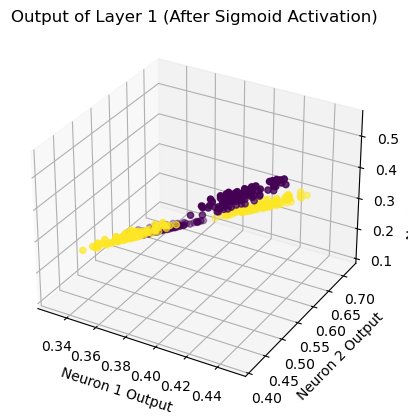

In [16]:
# Plot the result in 3D
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

ax.scatter(layer1_output_sigmoid[:, 0], layer1_output_sigmoid[:, 1], layer1_output_sigmoid[:, 2], c=labels, marker='o')

ax.set_xlabel('Neuron 1 Output')
ax.set_ylabel('Neuron 2 Output')
ax.set_zlabel('Neuron 3 Output')

plt.title('Output of Layer 1 (After Sigmoid Activation)')
plt.show()

## Second hidden layer result visualization

In [17]:
U2=np.dot(layer1_output_sigmoid,weights[1])+biases[1]

In [18]:
layer2_output_sigmoid=1/(1+np.exp(-U2))
layer2_output_sigmoid

matrix([[0.24873515, 0.65067707, 0.41980658],
        [0.24482359, 0.65454907, 0.41397099],
        [0.24584441, 0.65324473, 0.41549931],
        ...,
        [0.23534975, 0.66540998, 0.39956406],
        [0.23333364, 0.66772487, 0.3964352 ],
        [0.23225639, 0.66881499, 0.39472918]])

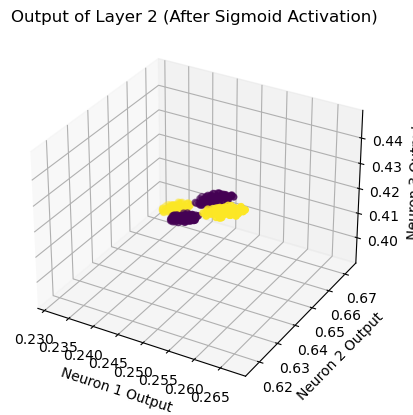

In [19]:
# Plot the result in 3D
fig2 = plt.figure()
ax = fig2.add_subplot(111, projection='3d')

ax.scatter(layer2_output_sigmoid[:, 0], layer2_output_sigmoid[:, 1], layer2_output_sigmoid[:, 2], c=labels, marker='o')

ax.set_xlabel('Neuron 1 Output')
ax.set_ylabel('Neuron 2 Output')
ax.set_zlabel('Neuron 3 Output')

plt.title('Output of Layer 2 (After Sigmoid Activation)')
plt.show()